# Predicting Income Classes with Machine Learning #

Author: Drew Wilimitis <br>
Date: 11/22/2018


In [1]:
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After performing exploratory data analysis and visualization, data cleaning, and engineering some features in R, we now implement our machine learning models in Python in order to take advantage of the scikit-learn framework

In [3]:
# read in the preprocessed training data
train_file = "C:/Users/Drew/Desktop/Hyatt/census_train_clean.csv"
train = pd.read_csv(train_file)

# read in validation or test data to be used later
test_file = "C:/Users/Drew/Desktop/Hyatt/census_validation.csv"
test = pd.read_csv(test_file)

In [4]:
# drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [68]:
# look at training data
# income_ind = 1 if income > 50K and 0 if income <= 50K
train.head()
train.info()
test.head()

,age,work_class,education,marital_status,occupation,race,sex,native_country,income_ind,non_zero_cap,hours_worked
0,39,gov,college_grad,not_married,middle_class,white,Male,developed,0,1,40-45
1,50,self,college_grad,married,upper_class,white,Male,developed,0,0,0-39
2,38,private,hs_grad,not_married,lower_class,white,Male,developed,0,0,40-45
3,53,private,no_hs,married,lower_class,non_white,Male,developed,0,0,40-45
4,28,private,college_grad,married,upper_class,non_white,Female,under_developed,0,0,40-45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
age               30162 non-null int64
work_class        30162 non-null object
education         30162 non-null object
marital_status    30162 non-null object
occupation        30162 non-null object
race              30162 non-null object
sex               30162 non-null object
native_country    30162 non-null object
income_ind        30162 non-null int64
non_zero_cap      30162 non-null int64
hours_worked      30162 non-null object
dtypes: int64(3), object(8)
memory usage: 2.5+ MB


,age,work_class,education,marital_status,occupation,race,sex,native_country,non_zero_cap,hours_worked,income
0,25,private,no_hs,not_married,lower_class,non_white,Male,developed,0,40-45,0
1,38,private,hs_grad,married,lower_class,white,Male,developed,0,46-60,0
2,28,gov,assoc,married,upper_class,white,Male,developed,0,40-45,1
3,44,private,assoc,married,lower_class,non_white,Male,developed,1,40-45,1
4,18,private,assoc,not_married,middle_class,white,Female,developed,0,0-39,0


We must further prepare the data in order to use with sci-kit learn <br>

We need to convert categorical variables to numeric indicators because sci-kit learn generally must have all numerical input variables

In [50]:
# a list of the categorical features in the training data
cat_features = ['work_class', 'education', 'marital_status', 'occupation', 
                'race', 'sex', 'native_country', 'hours_worked']

# data frame that contains only the categorical features in the training data
train_cat = train[cat_features]
test_cat = test[cat_features]

In [76]:
# import sklearn_pandas package to prepare pandas dataframe to be used by scikit learn
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

# convert categorical features into binary indicators ('one-hot' vector encoding)
feature_def = gen_features(
     columns=cat_features,
     classes=[LabelBinarizer])

# apply our transformations to the datasets
mapper = DataFrameMapper(feature_def)
data = train_cat
data_prep = mapper.fit_transform(data)

mapper_test = DataFrameMapper(feature_def)
data_test = test_cat
test_prep = mapper.fit_transform(data_test)

In [77]:
# examine the new indicator variables 
data_prep_names = mapper.transformed_names_
data_prep_names
# compare to first row of our transformed categorical data
data_prep[1]
# our transformed data is now a numpy array, which is better suited for use with scikit-learn
type(data_prep)

['work_class_gov',
 'work_class_private',
 'work_class_self',
 'education_assoc',
 'education_college_grad',
 'education_grad_school',
 'education_hs_grad',
 'education_no_hs',
 'marital_status',
 'occupation_lower_class',
 'occupation_middle_class',
 'occupation_upper_class',
 'race',
 'sex',
 'native_country',
 'hours_worked_0-39',
 'hours_worked_40-45',
 'hours_worked_46-60',
 'hours_worked_60+']

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

numpy.ndarray

In [78]:
# convert to numpy array and standardize age feature
age = np.array(train['age'])
age = (age - np.mean(age)) / np.std(age)

age_test = np.array(test['age'])
age_test = (age_test - np.mean(age_test)) / np.std(age_test)

# reshape to get a column vector
age = np.vstack(age)
age_test = np.vstack(age_test)

# convert to numpy array and reshape 
non_zero_cap = np.array(train['non_zero_cap'])
non_zero_cap = np.vstack(non_zero_cap)

non_zero_cap_test = np.array(test['non_zero_cap'])
non_zero_cap_test = np.vstack(non_zero_cap_test)

# add numerical features into our prepared training data
data_prep = np.append(data_prep, age, 1)
data_prep = np.append(data_prep, non_zero_cap, 1)

test_prep = np.append(test_prep, age_test, 1)
test_prep = np.append(test_prep, non_zero_cap_test, 1)

# examine the final feature names of our prepped data
data_prep_names.append('age')
data_prep_names.append('non_zero_cap')
data_prep_names

['work_class_gov',
 'work_class_private',
 'work_class_self',
 'education_assoc',
 'education_college_grad',
 'education_grad_school',
 'education_hs_grad',
 'education_no_hs',
 'marital_status',
 'occupation_lower_class',
 'occupation_middle_class',
 'occupation_upper_class',
 'race',
 'sex',
 'native_country',
 'hours_worked_0-39',
 'hours_worked_40-45',
 'hours_worked_46-60',
 'hours_worked_60+',
 'age',
 'non_zero_cap']

We have all of our features appropriately formatted and now we can begin fitting some models to the training data <br>
<br>
Before we begin building our predictive models, we consider some suitable algorithms for this problem

# <font color='blue'>Potential Classification Algorithms</font>
********


### Analyzing our prediction task 

* Binary classification: our target predictions are 1 (income > 50K), and 0 (income <= 50K)
* Class imbalance: roughly 25% of observations are in the positive class (1) for high-income 
* The size of our training set: somewhat small with around 30,000 observations (rows)
* Number of features, collinearity between features: relatively small number of features, however many of these predictor variables are likely correlated

Therefore, I will implement and compare the performance of the following three classification algorithms:

#### 1.) Logistic Regression

* Typically the first approach that comes to mind for binary classification
* Should perform well enough to compete with more complex models
* More interpretable than more complex models (odds-ratios will give the effects of predictor variables)
* Time complexity likely scales better than some more complex models

#### 2.) Support Vector Machine

* Powerful classification algorithm with straightforward implementation in scikit-learn
* Not as interpretable
* Time complexity does not scale very well, but should have good performance for this relatively small/medium dataset

#### 3.) Random Forest Classifier

* Ensemble method - possibly significant improvements in classification accuracy
* Not very interpretable, can become computationally expensive to tune hyperparameters
* Unlike logistic regression, doesn't output probabilities for the predictions

********

# Logistic Regression

In [80]:
# splitting the training features and the training income labels
X_train, y_train = data_prep, train['income_ind']
X_test, y_test = test_prep, test['income']

In [81]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1.0, max_iter = 1000)
log_model = log_reg.fit(X_train, y_train)
log_model

# view some predictions compared to true labels
print("Predictions:")
log_reg.predict(X_train[:10])
print("Actual values:")
np.array(y_train[:10])

# provide the predicted probabilities
y_train_probs = log_model.predict_proba(X_train[:10])
print("Predicted Probabilities:")
y_train_probs

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predictions:


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

Actual values:


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

Predicted Probabilities:


array([[0.70984319, 0.29015681],
       [0.507495  , 0.492505  ],
       [0.98437824, 0.01562176],
       [0.91984272, 0.08015728],
       [0.60669735, 0.39330265],
       [0.29444542, 0.70555458],
       [0.99811908, 0.00188092],
       [0.5642983 , 0.4357017 ],
       [0.41235885, 0.58764115],
       [0.10227478, 0.89772522]])

In [97]:
# make predictions on the whole training dataset
y_train_pred = log_model.predict(X_train)
# evaluate accuracy of training predictions
overall_acc = sum(y_train_pred == y_train) / len(y_train)
print("Accuracy: " + str(overall_acc))

Accuracy: 0.8339632650354751


In [83]:
# compare the accuracy to the base estimator (null model)
# by simply always predicting '0', accuracy = 75.1%
# by simply always predicting '1', precision = 24.9%
null_acc = 1 - y_train.mean()
null_prec =  y_train.mean()
print("Base model accuracy: " + str(null_acc))
print("Base model precision: " + str(null_prec))

Base model accuracy: 0.7510775147536636
Base model precision: 0.24892248524633645


In [84]:
# coefficients from logistic regression model
coef = np.transpose(log_model.coef_)
coef_list = np.squeeze(coef)

# display as data frame
coef_df = pd.DataFrame(coef_list)
coef_df['coef'] = coef_df[0]
coef_df[0] = data_prep_names
coef_df.columns = ['feature', 'coef']
coef_df['odds_ratio'] = np.exp(coef_df['coef'])
coef_df

,feature,coef,odds_ratio
0,work_class_gov,-0.137866,0.871216
1,work_class_private,-0.092180,0.911941
2,work_class_self,-0.237745,0.788404
3,education_assoc,-0.029825,0.970615
4,education_college_grad,0.567059,1.763075
5,education_grad_school,1.011342,2.749288
6,education_hs_grad,-0.536844,0.584590
7,education_no_hs,-1.479523,0.227746
8,marital_status,-2.288806,0.101387
9,occupation_lower_class,-0.822475,0.439343


## Evaluate performance on training data ##

In [85]:
# stratified K-fold cross validation (unbalanced target classes)
# note: this implementation is similar to cross_val_score from sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# set number of folds and random_state to maintain reproducibility
# for each iteration we partition training data into a train fold and a test fold 
skfolds = StratifiedKFold(n_splits=5, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    # make a new copy of the logistic regression classifier
    clone_clf = clone(log_reg)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    # fit model to train folds
    clone_model = clone_clf.fit(X_train_folds, y_train_folds)
    # make predictions on test folds
    y_pred = clone_model.predict(X_test_fold)
    # evaluate prediction accuracy on test folds
    print("Precision score:" + str(precision_score(y_test_fold, y_pred)))
    print("Recall score:" + str(recall_score(y_test_fold, y_pred)))
    print("Overall accuracy:" + str(accuracy_score(y_test_fold, y_pred)) + '\n')

Precision score:0.6846635367762128
Recall score:0.5825565912117177
Overall accuracy:0.8292723354881485

Precision score:0.6850202429149798
Recall score:0.563249001331558
Overall accuracy:0.8267860102768109

Precision score:0.7067851373182552
Recall score:0.5825565912117177
Overall accuracy:0.8359025360517156

Precision score:0.7229219143576826
Recall score:0.5736175882744837
Overall accuracy:0.8391909814323607

Precision score:0.7007751937984497
Recall score:0.6022651565622918
Overall accuracy:0.8370087879290333



### Precision and Recall

$$Precision = \frac{TP}{TP + TN}$$

precision = accuracy of positive predictions, or accuracy of high income predictions

$$Recall = \frac{TP}{TP + FN}$$

recall (sensitivity) = true positive rate, ratio of positive (high income) instances predicted correctly

## Tuning the model

In [135]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'] }

grid_search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
final_model = grid_search.best_estimator_

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'C': 0.01, 'penalty': 'l2'}

**We find that the best value for the "regularization" parameter C is 0.01**

## Evaluating performance on test set

In [213]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
test_pred = final_model.predict(X_test)
print("Precision score:" + str(precision_score(y_test, test_pred)))
print("Recall score:" + str(recall_score(y_test, test_pred)))
print("f1 score:" + str(f1_score(y_test, test_pred)))
print("Overall accuracy:" + str(accuracy_score(y_test, test_pred)))

Precision score:0.6837403216200119
Recall score:0.5969838793551742
f1 score:0.6374236535258189
Overall accuracy:0.8395675941281248


### Confusion Matrix

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[11555   880]
 [ 1743  2103]]


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[0.93 0.07]
 [0.45 0.55]]


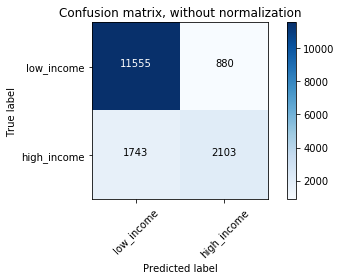

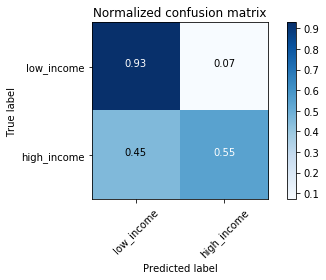

In [92]:
# function to plot a graphical display of confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# class names
class_names = ['low_income', 'high_income']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The confusion matrix shows the prediction accuracy for >50K was 55% and 93% accurate for <=50K

### ROC Curve and AUC ('Area under curve') score

ROC Curve and auc score are a way to evaluate the performance of the classifier over both income prediction classes
<br>
<br>
The dotted line represents a useless classifier
<br>
<br>
Predicting every instance as a "1" will have maximal True Positive rate and False Positive rate
<br>
<br>
The allowed rate of False positives is determined by the specific problem (i.e. Fraud detection might require a lower probability threshhold to decide to classify fradulent activity - higher rates of false positives)

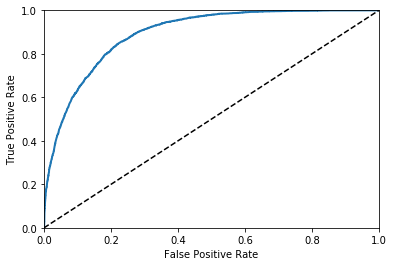

0.8925189351763857

In [184]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict

y_scores = log_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# function to plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

# AUC "Area under curve" score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

## Decision threshhold
<br>
<br>
Precision/Recall Tradeoff - Raising threshhold increases precision, lowers recall
<br>
Lowering threshhold decreases precision, increases recall

In [163]:
# examine decision function used in classifier
y_scores = log_model.decision_function(X_train[:10])
y_scores
np.array(y_train[:10])

# decision threshhold at 0
y_train_pred[:10]
threshhold = 0
y_scores > threshhold

array([-0.89, -0.03, -4.14, -2.44, -0.43,  0.87, -6.27, -0.26,  0.35,
        2.17])

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

array([False, False, False, False, False,  True, False, False,  True,
        True])

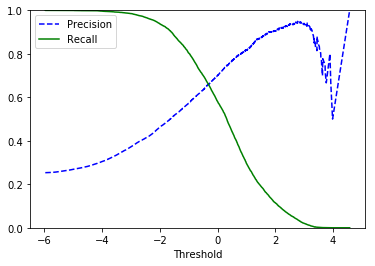

In [161]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# function to plot precision and recall over all decision threshholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

We can see the tradeoff between Precision and Recall. For this problem, since we have a class imbalance and only 25% of samples have an income >50K, correctly predicting more of the high-income class is likely preferrable. Therefore, we test the model performance with a decreased threshhold for identifying an individual in the positive (high-income) class.

In [182]:
# test accuracy at different threshholds for the probability cutoff
pred_prob = log_model.predict_proba(X_test)
pred_prob_df = pd.DataFrame(pred_prob)

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_prob_df.applymap(lambda x: 1 if x>i else 0)
    recall = recall_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Recall score is {}'.format(recall))
    precision = precision_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Precision score is {}'.format(precision))
    acc = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Accuracy score is {}'.format(acc))


******** For i = 0.05 ******
Recall score is 0.984919396775871
Precision score is 0.3641607383195539
Accuracy score is 0.5901971623364658

******** For i = 0.1 ******
Recall score is 0.953198127925117
Precision score is 0.4279710483306094
Accuracy score is 0.6879798538173331

******** For i = 0.15 ******


C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\Drew\Anaconda3\lib\site-package

Recall score is 0.9170566822672906
Precision score is 0.4790167051473584
Accuracy score is 0.7447945457895707

******** For i = 0.2 ******
Recall score is 0.8684347373894956
Precision score is 0.5199252801992528
Accuracy score is 0.7794975738590996

******** For i = 0.25 ******
Recall score is 0.8265730629225169
Precision score is 0.5544122776421346
Accuracy score is 0.8021006080707573

******** For i = 0.3 ******
Recall score is 0.7750910036401456
Precision score is 0.5824540836264166
Accuracy score is 0.815613291566857

******** For i = 0.35 ******
Recall score is 0.718928757150286
Precision score is 0.6091650143203349
Accuracy score is 0.8246422209937965

******** For i = 0.4 ******
Recall score is 0.6734269370774831
Precision score is 0.637616937469227
Accuracy score is 0.8324427246483631

******** For i = 0.45 ******
Recall score is 0.624804992199688
Precision score is 0.6658354114713217
Accuracy score is 0.8372950064492353

******** For i = 0.5 ******
Recall score is 0.5741029641

C:\Users\Drew\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


From the various metrics at the different threshhold levels, it would be optimal to set the cutoff probability around 0.35 to have a more balanced accuracy across both income classes.
<br>
<br>
Therefore, we decrease the threshhold in order to increase the recall.

In [214]:
# final predictions with logistic regression model
pred_prob = log_model.predict_proba(X_test)
pred_prob_df = pd.DataFrame(pred_prob)
pred_prob_df[1] = np.where(pred_prob_df[1] > 0.35, 1, 0)
y_test_pred = pred_prob_df[1]

print("Precision score:" + str(precision_score(y_test, y_test_pred)))
print("Recall score:" + str(recall_score(y_test, y_test_pred)))
print("f1 score:" + str(f1_score(y_test, y_test_pred)))
print("Overall accuracy:" + str(accuracy_score(y_test, y_test_pred)))

Precision score:0.6091650143203349
Recall score:0.718928757150286
f1 score:0.6595110316040549
Overall accuracy:0.8246422209937965


Although the overall accuracy dropped very slightly, we now have a higher F1 score and much better recall.

# Stochastic Gradient Descent Classifier

Stochastic Gradient Descent is an algorithm that minimizes some cost function, and the SGDClassifier in scikit-learn uses Stochastic Gradient Descent to train or optimize either a logistic regression classifier or a linear SVM classifier
<br>
<br>
It depends on the loss parameter: if loss = 'log' - logistic regression, if loss = 'hinge' - linear SVM

In [148]:
from sklearn.linear_model import SGDClassifier

# train a logistic regression model with loss = 'log'
sgd_clf = SGDClassifier(random_state=42, loss='log', max_iter = 1000)
sgd_clf.fit(X_train, y_train)

# test a few simple predictions
sgd_clf.predict(X_train[:10])
y_train[:10]

y_train_pred = sgd_clf.predict(X_train)

print("Precision score:" + str(precision_score(y_train, y_train_pred)))
print("Recall score:" + str(recall_score(y_train, y_train_pred)))
print("Overall accuracy:" + str(accuracy_score(y_train, y_train_pred)))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income_ind, dtype: int64

Precision score:0.7050442188011792
Recall score:0.5733883857218967
Overall accuracy:0.834095882235926


### Tuning the model hyperparameters

In [227]:
# Grid search
from sklearn.model_selection import GridSearchCV
sgd_clf = SGDClassifier(loss = 'log', max_iter = 34)

# suggested range for tuning alpha, suggested max_iter = np.ceil(10**6 / n) where n = number of samples
# from scikit-learn documentation at https://scikit-learn.org/stable/modules/sgd.html
alpha_range = 10.0**-np.arange(1,7)
param_grid = {'alpha': alpha_range }

grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring = 'f1')
grid_search.fit(X_train, y_train)
grid_search.best_params_
final_model = grid_search.best_estimator_

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=34, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

{'alpha': 0.0001}

In [228]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

test_pred = final_model.predict(X_test)
print("Precision score:" + str(precision_score(y_test, test_pred)))
print("Recall score:" + str(recall_score(y_test, test_pred)))
print("F1 score:" + str(recall_score(y_test, test_pred)))
print("Overall accuracy:" + str(accuracy_score(y_test, test_pred)))
print("roc auc:" + str(roc_auc_score(y_test, test_pred)))

Precision score:0.7066047129107202
Recall score:0.5535621424856995
F1 score:0.5535621424856995
Overall accuracy:0.8402432283029297
roc auc:0.7412362381105619


# Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

y_train_pred = forest_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.9100523837941781

0.8372485581657054

0.7927543953116676

In [232]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10, 50, 100], 'max_features': [8, 15, 20]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'max_features': [8, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [233]:
grid_search.best_params_
final_model = grid_search.best_estimator_

{'max_features': 20, 'n_estimators': 100}

In [234]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

test_pred = final_model.predict(X_test)

print("Precision score:" + str(precision_score(y_test, test_pred)))
print("Recall score:" + str(recall_score(y_test, test_pred)))
print("Overall accuracy:" + str(accuracy_score(y_test, test_pred)))

Precision score:0.6237595690388432
Recall score:0.5720228809152366
Overall accuracy:0.8173945089367975


# Support Vector Machine

In [240]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.839035872952722

0.7214893972282518

0.5755194459243473

In [235]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1, loss='squared_hinge', max_iter = 2000)
svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

0.8345268881373914

0.7046008779060315

0.5772509323388386

In [117]:
# stratified K-fold cross validation (unbalanced target classes)
# note: this implementation is similar to cross_val_score from sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# set number of folds and random_state to maintain reproducibility
# for each iteration we partition training data into a train fold and a test fold 
skfolds = StratifiedKFold(n_splits=5, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    # make a new copy of the classifier
    clone_clf = clone(svm_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    # fit model to train folds
    clone_model = clone_clf.fit(X_train_folds, y_train_folds)
    # make predictions on test folds
    y_pred = clone_model.predict(X_test_fold)
    # evaluate prediction accuracy on test folds
    print("Precision score:" + str(precision_score(y_test_fold, y_pred)))
    print("Recall score:" + str(recall_score(y_test_fold, y_pred)))
    print("Overall accuracy:" + str(accuracy_score(y_test_fold, y_pred)) + '\n')

Precision score:0.6865079365079365
Recall score:0.5758988015978695
Overall accuracy:0.8289408254599702

Precision score:0.6826688364524003
Recall score:0.5585885486018641
Overall accuracy:0.8254599701640974

Precision score:0.7134599504541701
Recall score:0.5752330226364847
Overall accuracy:0.8367313111221615

Precision score:0.7280477408354646
Recall score:0.5689540306462358
Overall accuracy:0.8398541114058355

Precision score:0.702808112324493
Recall score:0.6002664890073285
Overall accuracy:0.8373404078925551



In [237]:
# Grid search
from sklearn.model_selection import GridSearchCV
svm_clf = LinearSVC()
param_grid = {'C': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring = 'f1')
grid_search.fit(X_train, y_train)
grid_search.best_params_
final_model = grid_search.best_estimator_

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

{'C': 10}

In [239]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

test_pred = final_model.predict(X_test)
print("Precision score:" + str(precision_score(y_test, test_pred)))
print("Recall score:" + str(recall_score(y_test, test_pred)))
print("f1 score:" + str(f1_score(y_test, test_pred)))
print("Overall accuracy:" + str(accuracy_score(y_test, test_pred)))

Precision score:0.6965189873417722
Recall score:0.5722828913156526
f1 score:0.6283185840707963
Overall accuracy:0.8400589644370738


# Conclusion #

The hypothesis that Logistic Regression would not be significantly outperformed by the more complex models seems to be substantiated after comparing model performance.
<br>

The SGDClassifier and the LinearSVC models both performed about the same as Logistic Regression in terms of precision, recall, and overall accuracy.
<br>

The Random Forest Classifier showed significant signs of overfitting, as this model performed significantly better on the training data than it did on the test data.
<br>

I would be inclined to go with the Logistic Regression model for this specific problem, however; there were several limiting factors here (especially time and computational resources). Some further areas to explore might be:
<br>
* Further investigating more features to engineer, feature importances/correlations
* More rigorous and extensive tuning of the model hyperparameters
* Giving more thought to how the class imbalance should be handled
* Investigating further into the decision threshholds and seeing the impact on precision/recall